## KNN Classifier


### Heart failure dataset


Overfit on knn is rather weird.
One could say that a model with a small k could overfit since it is a specialization of a model with a larger K.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../../datasets/heart_failure_clinical_records_dataset.csv')

In [2]:
y: np.ndarray = data.pop('DEATH_EVENT').values # Target Variable
X: np.ndarray = data.values # Values of each feature on each record
labels = pd.unique(y)
    
kf = KFold(n_splits = 10, shuffle=True)

In [3]:
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']

We will plot for all different distances, but we expect them to behave in a similar way.
With a smaller k the models will overfit the train data

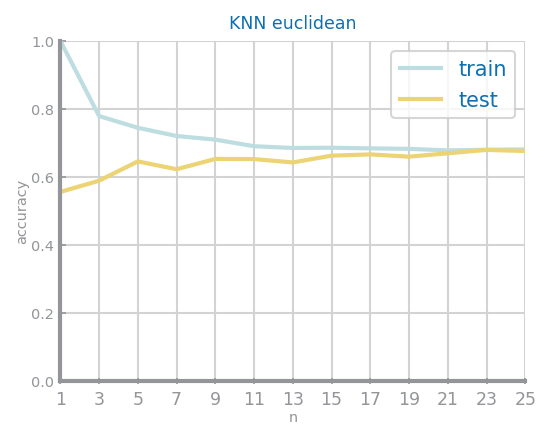

In [4]:
values = {}
best = (0, '')
best_model = None
last_best = 0
tra_acc=[]
tes_acc=[]
for n in nvalues:
    tes=0
    trai=0
    for train_index, test_index in kf.split(X):
        trnX, tstX = X[train_index], X[test_index]
        trnY, tstY = y[train_index], y[test_index]

        knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
        knn.fit(trnX, trnY)
        prd_trn = knn.predict(trnX)
        prd_tst = knn.predict(tstX)
        trai+=metrics.accuracy_score(trnY, prd_trn)
        tes+=metrics.accuracy_score(tstY, prd_tst)
    tra_acc.append(trai/10)
    tes_acc.append(tes/10)
values["train"] = tra_acc
values["test"] = tes_acc

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN euclidean', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()


For chebyshev distance

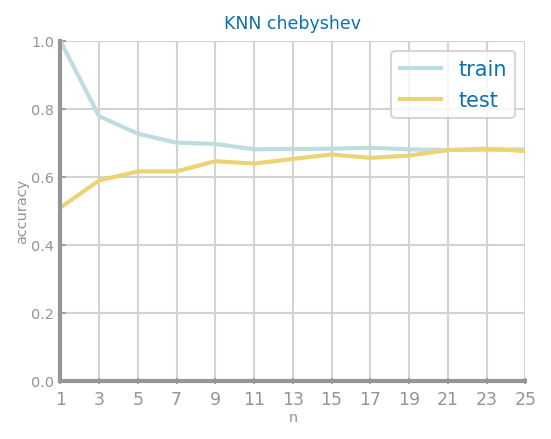

In [5]:
values = {}
best = (0, '')
best_model = None
last_best = 0
tra_acc=[]
tes_acc=[]
for n in nvalues:
    tes=0
    trai=0
    for train_index, test_index in kf.split(X):
        trnX, tstX = X[train_index], X[test_index]
        trnY, tstY = y[train_index], y[test_index]

        knn = KNeighborsClassifier(n_neighbors=n, metric='chebyshev')
        knn.fit(trnX, trnY)
        prd_trn = knn.predict(trnX)
        prd_tst = knn.predict(tstX)
        trai+=metrics.accuracy_score(trnY, prd_trn)
        tes+=metrics.accuracy_score(tstY, prd_tst)
    tra_acc.append(trai/10)
    tes_acc.append(tes/10)
values["train"] = tra_acc
values["test"] = tes_acc

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN chebyshev', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()


For manhattan distance

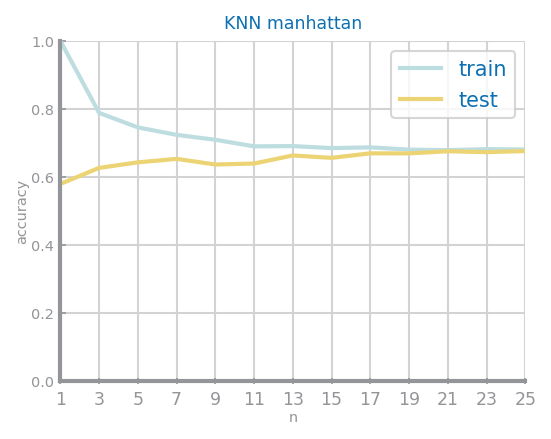

In [6]:
values = {}
best = (0, '')
best_model = None
last_best = 0
tra_acc=[]
tes_acc=[]
for n in nvalues:
    tes=0
    trai=0
    for train_index, test_index in kf.split(X):
        trnX, tstX = X[train_index], X[test_index]
        trnY, tstY = y[train_index], y[test_index]

        knn = KNeighborsClassifier(n_neighbors=n, metric='manhattan')
        knn.fit(trnX, trnY)
        prd_trn = knn.predict(trnX)
        prd_tst = knn.predict(tstX)
        trai+=metrics.accuracy_score(trnY, prd_trn)
        tes+=metrics.accuracy_score(tstY, prd_tst)
    tra_acc.append(trai/10)
    tes_acc.append(tes/10)
values["train"] = tra_acc
values["test"] = tes_acc

plt.figure()
ds.multiple_line_chart(nvalues, values, title='KNN manhattan', xlabel='n', ylabel='accuracy', percentage=True)
plt.show()


#### Results

Just as we expected, the models are overfiting at lowers Ks.

During out analisys and model building, the models wouldn't have such small Ks, at least the better performing ones, this might come form the fact that we use K-fold cross validation. As such, it is really unlikely that our KNN models are overtifed.